In [37]:
############## Machine Learning: Linear Regression: CAR DATASET #############
################# Step 1: Import all the required Libraries #################
 
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

In [38]:
################## Machine Learning: Linear Regression #####################
################ Step 2: Reading (or Loading) the dataset: #################

data = pd.read_csv('car.csv')
data.head()

MODELYEAR   MAKE       MODEL VEHICLECLASS  ENGINESIZE  CYLINDERS  \
0       2014  ACURA         ILX      COMPACT         2.0          4   
1       2014  ACURA         ILX      COMPACT         2.4          4   
2       2014  ACURA  ILX HYBRID      COMPACT         1.5          4   
3       2014  ACURA     MDX 4WD  SUV - SMALL         3.5          6   
4       2014  ACURA     RDX AWD  SUV - SMALL         3.5          6   

  TRANSMISSION FUELTYPE  FUELCONSUMPTION_CITY  FUELCONSUMPTION_HWY  \
0          AS5        Z                   9.9                  6.7   
1           M6        Z                  11.2                  7.7   
2          AV7        Z                   6.0                  5.8   
3          AS6        Z                  12.7                  9.1   
4          AS6        Z                  12.1                  8.7   

   FUELCONSUMPTION_COMB  FUELCONSUMPTION_COMB_MPG  CO2EMISSIONS  
0                   8.5                        33           196  
1                   9.6                        29           221  
2                   5.9                        48           136  
3                  11.1                        25           255  
4                  10.6                        27           244

In [39]:

############# Machine Learning: Linear Regression #############
################# Step 3: Inspect Data Types: #################
# Inspect data types: To view the data types of each column in the DataFrame, (1) use the .info() method or (2) the .dtypes attribute.


# Load the CSV file into a pandas DataFrame
try:
    data = pd.read_csv('car.csv')

    # Get the shape of the DataFrame
    # The .shape attribute returns a tuple (number_of_rows, number_of_columns)
    data_shape = data.shape

    # Print the shape
    print(f"The shape of car.csv is: {data_shape}")
    print(f"Number of rows: {data_shape[0]}")
    print(f"Number of columns: {data_shape[1]}")
    
    # Using .dtypes for a Series showing only data types
    print(f"\nType of data is: {data.dtypes}")
    
except FileNotFoundError:
    print("Error: 'car.csv' not found. Please ensure the file is in the correct directory.")
except Exception as e:
    print(f"An error occurred: {e}")

The shape of car.csv is: (1067, 13)
Number of rows: 1067
Number of columns: 13

Type of data is: MODELYEAR                     int64
MAKE                         object
MODEL                        object
VEHICLECLASS                 object
ENGINESIZE                  float64
CYLINDERS                     int64
TRANSMISSION                 object
FUELTYPE                     object
FUELCONSUMPTION_CITY        float64
FUELCONSUMPTION_HWY         float64
FUELCONSUMPTION_COMB        float64
FUELCONSUMPTION_COMB_MPG      int64
CO2EMISSIONS                  int64
dtype: object


In [40]:
############# Machine Learning: Linear Regression #############
################# Step 3: Inspect Data Types: #################
# Inspect data types: To view the data types of each column in the DataFrame, (1) use the .info() method or (2) the .dtypes attribute.

data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1067 entries, 0 to 1066
Data columns (total 13 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   MODELYEAR                 1067 non-null   int64  
 1   MAKE                      1067 non-null   object 
 2   MODEL                     1067 non-null   object 
 3   VEHICLECLASS              1067 non-null   object 
 4   ENGINESIZE                1067 non-null   float64
 5   CYLINDERS                 1067 non-null   int64  
 6   TRANSMISSION              1067 non-null   object 
 7   FUELTYPE                  1067 non-null   object 
 8   FUELCONSUMPTION_CITY      1067 non-null   float64
 9   FUELCONSUMPTION_HWY       1067 non-null   float64
 10  FUELCONSUMPTION_COMB      1067 non-null   float64
 11  FUELCONSUMPTION_COMB_MPG  1067 non-null   int64  
 12  CO2EMISSIONS              1067 non-null   int64  
dtypes: float64(4), int64(4), object(5)
memory usage: 108.5+ KB


In [41]:
####################### Machine Learning: Linear Regression ######################
################## Step 4: To calculate the correlation matrix: ##################

data1 = data[['ENGINESIZE', 'CYLINDERS', 'FUELCONSUMPTION_COMB', 'CO2EMISSIONS']]
data1

ENGINESIZE  CYLINDERS  FUELCONSUMPTION_COMB  CO2EMISSIONS
0            2.0          4                   8.5           196
1            2.4          4                   9.6           221
2            1.5          4                   5.9           136
3            3.5          6                  11.1           255
4            3.5          6                  10.6           244
...          ...        ...                   ...           ...
1062         3.0          6                  11.8           271
1063         3.2          6                  11.5           264
1064         3.0          6                  11.8           271
1065         3.2          6                  11.3           260
1066         3.2          6                  12.8           294

[1067 rows x 4 columns]

In [42]:
####################### Machine Learning: Linear Regression ######################
################## Step 4: To calculate the correlation matrix: ##################

cor = data1.corr()
cor

ENGINESIZE  CYLINDERS  FUELCONSUMPTION_COMB  \
ENGINESIZE              1.000000   0.934011              0.819482   
CYLINDERS               0.934011   1.000000              0.776788   
FUELCONSUMPTION_COMB    0.819482   0.776788              1.000000   
CO2EMISSIONS            0.874154   0.849685              0.892129   

                      CO2EMISSIONS  
ENGINESIZE                0.874154  
CYLINDERS                 0.849685  
FUELCONSUMPTION_COMB      0.892129  
CO2EMISSIONS              1.000000

In [43]:
####################### Machine Learning: Linear Regression ######################
################## Step 4: To calculate the correlation matrix: ##################

#################### Explantion about .corr() ####################
# To calculate the correlation matrix in Python, you can use the .corr() method from the pandas library. 
# Assuming data2 is a pandas DataFrame, the line cor = data2.corr() will compute the pairwise correlation of all columns and store the result in the cor variable. 

#################################################################
# Other correlation methods
# The .corr() method also allows you to specify a different correlation method using the method parameter. 
# method='pearson': Standard correlation coefficient (default).
# method='kendall': Kendall Tau correlation coefficient.
# method='spearman': Spearman rank correlation. 

# Example:
import pandas as pd

# 1. Create a sample pandas DataFrame
data2 = pd.DataFrame({
    'col1': [1, 2, 3, 4, 5],
    'col2': [2, 4, 5, 4, 5],
    'col3': [5, 4, 3, 2, 1]
})

# 2. Calculate the correlation matrix
cor = data2.corr()

# 3. Print the resulting correlation matrix
print(cor)


          col1      col2      col3
col1  1.000000  0.774597 -1.000000
col2  0.774597  1.000000 -0.774597
col3 -1.000000 -0.774597  1.000000


In [44]:
####################### Machine Learning: Linear Regression ######################
################## Step 4: To calculate the correlation matrix: ##################

#################### Explantion about .corr() ####################
# To calculate the correlation matrix in Python, you can use the .corr() method from the pandas library. 
# The .corr() method in Pandas calculates the pairwise correlation between columns in a DataFrame. By default, it uses the Pearson correlation coefficient. 
# The calculation for the Pearson correlation coefficient between two variables, X and Y, is as follows:
#### r = Cov(X, Y) / (std(X) * std(Y)) ####
# Assuming data1 is a pandas DataFrame, the line cor = data1.corr() will compute the pairwise correlation of all columns and store the result in the cor variable. 
# If x and y are matrices then the covariances (or correlations) between the columns of x and the columns of y are computed.

#################################################################
# Other correlation methods
# The .corr() method also allows you to specify a different correlation method using the method parameter. 
# method='pearson': Standard correlation coefficient (default).
# method='kendall': Kendall Tau correlation coefficient.
# method='spearman': Spearman rank correlation. 

# Example:

# Calculate the correlation using the Spearman method
cor_spearman = data2.corr(method='spearman')
print(cor_spearman)


          col1      col2      col3
col1  1.000000  0.737865 -1.000000
col2  0.737865  1.000000 -0.737865
col3 -1.000000 -0.737865  1.000000


In [45]:
####################### Machine Learning: Linear Regression ######################
################## Step 4: To calculate the correlation matrix: ##################

cor = data1.corr()
cor[(cor>0.85) & (cor!=1)]

ENGINESIZE  CYLINDERS  FUELCONSUMPTION_COMB  \
ENGINESIZE                   NaN   0.934011                   NaN   
CYLINDERS               0.934011        NaN                   NaN   
FUELCONSUMPTION_COMB         NaN        NaN                   NaN   
CO2EMISSIONS            0.874154        NaN              0.892129   

                      CO2EMISSIONS  
ENGINESIZE                0.874154  
CYLINDERS                      NaN  
FUELCONSUMPTION_COMB      0.892129  
CO2EMISSIONS                   NaN

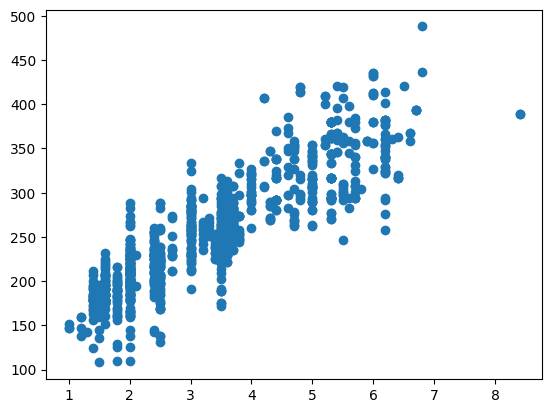

In [46]:
####################### Machine Learning: Linear Regression ######################
################## Step 4: To calculate the correlation matrix: ##################

x = data['ENGINESIZE']
y = data['CO2EMISSIONS']
plt.scatter(x, y)


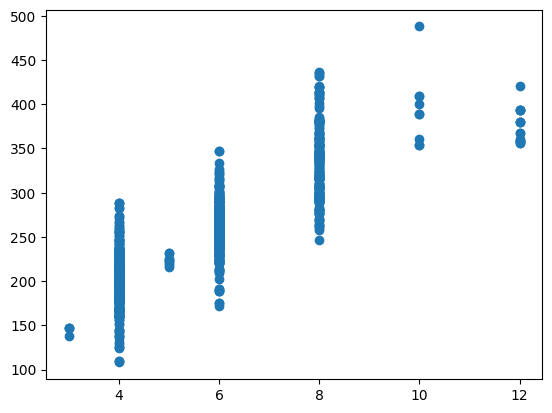

In [47]:
####################### Machine Learning: Linear Regression ######################
################## Step 4: To calculate the correlation matrix: ##################

x = data['CYLINDERS']
y = data['CO2EMISSIONS']
plt.scatter(x, y)


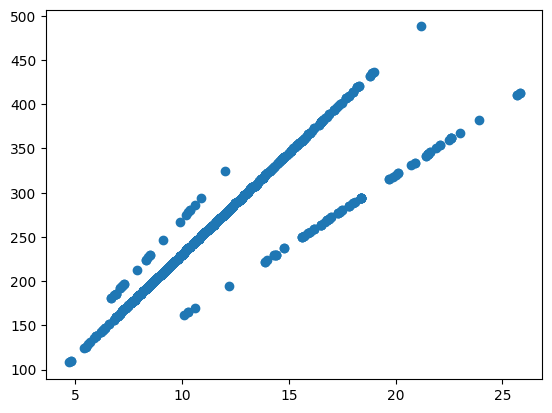

In [48]:
####################### Machine Learning: Linear Regression ######################
################## Step 4: To calculate the correlation matrix: ##################

x = data['FUELCONSUMPTION_COMB']
y = data['CO2EMISSIONS']
plt.scatter(x, y)


In [51]:
############################ Machine Learning: Linear Regression #############################
##################### Step 5: # Extracting the feature and reshape it: #######################

##### Why this is necessary for scikit-learn? #####
# Many machine learning algorithms in libraries like scikit-learn expect input data for features (X) to be a two-dimensional array with the shape (n_samples, n_features). 
# n_samples: The number of data points or observations.
# n_features: The number of variables used for prediction. 
# When you extract a single column like ENGINESIZE, it is treated as a one-dimensional array or vector. 
# The reshape(-1, 1) operation is needed to convert this single-feature data into the (n_samples, 1) shape that the models expect. 
# If you don't perform this reshaping, scikit-learn will often produce an error.
# For instance, a 1D array [10, 20, 30] becomes a 2D array [[10], [20], [30]]. The result is a two-dimensional array with many rows and a single column. 

# Extract the feature and reshape it
x = data['ENGINESIZE'].values.reshape(-1, 1)
y = data['CO2EMISSIONS']

In [52]:
############################ Machine Learning: Linear Regression ###############################
################ Step 6: Create and Split data into training and testing sets: #################

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 42)
print(f"shape of x_train is {x_train.shape} \nshape of y_train is {y_train.shape}")
print(x_train.shape, y_train.shape, x_test.shape, y_test.shape)


shape of x_train is (853, 1) 
shape of y_train is (853,)
(853, 1) (853,) (214, 1) (214,)


In [53]:
x_train

array([[1.4],
       [4.4],
       [3. ],
       [3. ],
       [5.3],
       [4.4],
       [3.7],
       [2. ],
       [4. ],
       [3.6],
       [4.2],
       [2.4],
       [6.5],
       [5. ],
       [5.7],
       [3.7],
       [6.2],
       [3.5],
       [3.6],
       [2.4],
       [3.6],
       [2. ],
       [2. ],
       [2.5],
       [1.4],
       [3.6],
       [3.6],
       [3.6],
       [4. ],
       [2. ],
       [3.5],
       [5.6],
       [2.5],
       [4. ],
       [3.5],
       [1.6],
       [2. ],
       [3.5],
       [5.3],
       [3.7],
       [2. ],
       [6.6],
       [3.7],
       [5.6],
       [3.6],
       [6.2],
       [3. ],
       [1.4],
       [4.4],
       [4.3],
       [5. ],
       [3.7],
       [2. ],
       [3.6],
       [2.4],
       [5.3],
       [5.7],
       [5.5],
       [1.6],
       [3. ],
       [3.5],
       [4. ],
       [3. ],
       [1.6],
       [2.4],
       [3. ],
       [3.6],
       [1.4],
       [2.4],
       [2. ],
       [3. ],
      

In [54]:
########################### Machine Learning: Linear Regression #############################
##################### Step 7: Create and train a LinearRegression model: ####################

RegModel = LinearRegression()
RegModel.fit(x_train, y_train)

LinearRegression()

In [55]:
y_train

333     179
106     292
585     267
55      262
213     380
       ... 
330     276
466     230
121     317
1044    198
860     398
Name: CO2EMISSIONS, Length: 853, dtype: int64

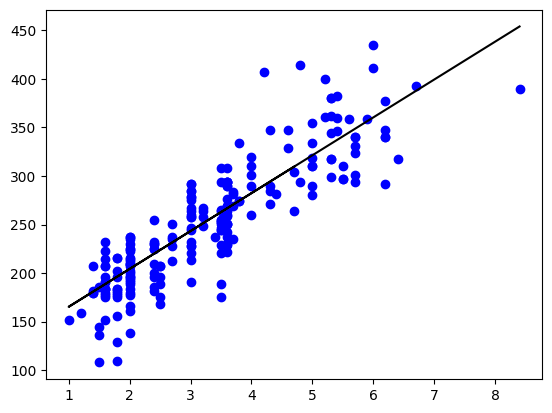

In [56]:
################### Machine Learning: Linear Regression ##################
##################### Step 8: Exploring our results: #####################

y_pre = RegModel.predict(x_test)

plt.scatter(x_test, y_test, color ='b')
plt.plot(x_test, y_pre, color ='k')

plt.show()
# Data scatter of predicted values

In [57]:
################### Machine Learning: Linear Regression ##################
##################### Step 8: Exploring our results: #####################

from sklearn.metrics import r2_score
r = r2_score(y_test, y_pre)
r

0.7615595731934373

In [58]:
################### Machine Learning: Linear Regression ##################
##################### Step 8: Exploring our results: #####################

y_pre

array([309.55670218, 262.76512771, 266.66442558, 243.26863835,
       204.27565962, 243.26863835, 266.66442558, 282.26161707,
       321.2545958 , 266.66442558, 266.66442558, 387.54265963,
       251.06723409, 262.76512771, 266.66442558, 262.76512771,
       188.67846813, 266.66442558, 188.67846813, 332.95248941,
       321.2545958 , 196.47706388, 251.06723409, 270.56372345,
       243.26863835, 196.47706388, 204.27565962, 188.67846813,
       340.75108516, 251.06723409, 336.85178729, 219.87285111,
       196.47706388, 321.2545958 , 243.26863835, 309.55670218,
       282.26161707, 332.95248941, 204.27565962, 223.77214899,
       188.67846813, 188.67846813, 180.87987239, 223.77214899,
       282.26161707, 188.67846813, 243.26863835, 243.26863835,
       204.27565962, 329.05319154, 368.04617027, 266.66442558,
       204.27565962, 270.56372345, 243.26863835, 332.95248941,
       332.95248941, 348.5496809 , 204.27565962, 293.95951069,
       282.26161707, 293.95951069, 297.85880856, 266.66

In [59]:
################### Machine Learning: Linear Regression ##################
##################### Step 8: Exploring our results: #####################

y = RegModel.predict([[2.0]])
y

array([204.27565962])

In [60]:
################### Machine Learning: Linear Regression ##################
##################### Step 8: Exploring our results: #####################

RegModel.coef_

array([38.99297872])

In [61]:
################### Machine Learning: Linear Regression ##################
##################### Step 8: Exploring our results: #####################

RegModel.intercept_

np.float64(126.28970217408721)

In [62]:
################### Machine Learning: Linear Regression ##################
##################### Step 8: Exploring our results: #####################

x = data['FUELCONSUMPTION_COMB']
y = data['CO2EMISSIONS']

# Get the coefficient (slope) and intercept
slope = RegModel.coef_[0]
intercept = RegModel.intercept_

print(f"Model fitted with slope: {slope:.2f}")
print(f"Model fitted with intercept: {intercept:.2f}")

# 3. Plot the original data
plt.scatter(x, y, color='b', label='Original Data')

# 4. Plot the regression line
# The line equation is y = slope * x + intercept
# To plot the line, create a range of x-values and compute the corresponding y-values
x_line = np.linspace(0, 10, 100)
y_line = slope * x_line + intercept
plt.plot(x_line, y_line, color='r', label=f'Regression Line: y={slope:.2f}x + {intercept:.2f}')

# Add labels, title, and legend for clarity
plt.title('Linear Regression Plot')
plt.xlabel('Independent Variable (X)')
plt.ylabel('Dependent Variable (y)')
plt.legend()
plt.grid(True)
plt.show()


Model fitted with slope: 38.99
Model fitted with intercept: 126.29


In [63]:
################### Machine Learning: Linear Regression ##################
##################### Step 9: Evaluating our results: ####################

mse = mean_squared_error(y_test, y_pre)
mse

985.9381692274999

In [65]:
################### Machine Learning: Linear Regression ###################
##################### Step 9: Evaluating our results: #####################

r = r2_score(y_test, y_pre)
r

0.7615595731934373